<a href="https://colab.research.google.com/github/fcernafukuzaki/GoogleColab/blob/master/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
# Trabajar con arreglos.
import numpy as np
# Redes neuronales
import torch.nn as nn
# Optimizaciones
import torch.optim as optim

#Graficar
import matplotlib.pyplot as plt

# Regresión Lineal

---



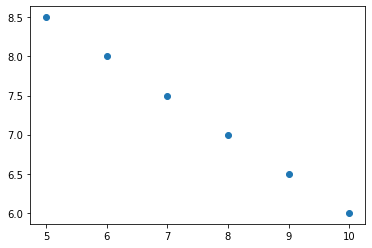

In [2]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [5]:
# Convertir arreglo a Numpy
# para comprender conversión de datos
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)

prices_array, prices_array

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]))

In [6]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
# No necesita gradientes porque es lo que se va a tratar de explicar.
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.016139693558216095


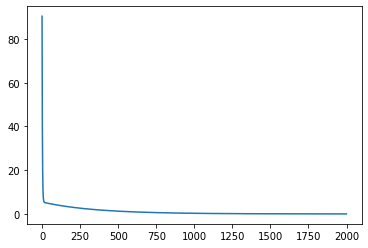

In [11]:
# Función Linear recibe como parámetros las dimensiones de la entrada y salida.
model = nn.Linear(1, 1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

# Crear training loop
losses = []
iterations = 2000

for i in range(iterations):
  prediction = model(prices)
  loss = loss_function(prediction, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [12]:
# El modelo ya se encuentra entrenado.

# Predecir valor.
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7186]], grad_fn=<AddmmBackward>)